<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [67]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [68]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [69]:
data= requests.get(url).text

Create a soup object


In [70]:
soup= BeautifulSoup(data, 'html5lib')

Scrape the `Language name` and `annual average salary`.


In [71]:

table = pd.DataFrame(columns={"Language","Average Annual Salary"})
for row in soup.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as color_name
    annual_average_salary = cols[3].getText() # store the value in column 4 as color_code
    print("{}--->{}".format(language,annual_average_salary))
    table = table.append({"Language": language, "Average Annual Salary":annual_average_salary}, ignore_index=True)
    
table.head()

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


,Language,Average Annual Salary
0,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"


Save the scrapped data into a file named *popular-languages.csv*


In [72]:
df= pd.DataFrame(table, columns=['Language', 'Average Annual Salary'])
df.drop(df.index[0], inplace=True)
df.to_csv('popular-languages.csv')

df

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [73]:
df['Average Annual Salary']= df['Average Annual Salary'].str.replace('$','').str.replace(',', '')

/tmp/wsuser/ipykernel_154/1434299977.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average Annual Salary']= df['Average Annual Salary'].str.replace('$','').str.replace(',', '')


In [74]:
df['Average Annual Salary']= df['Average Annual Salary'].astype(int)

In [76]:
df.sort_values('Average Annual Salary', ascending=False, inplace=True, ignore_index=True)
df

,Language,Average Annual Salary
0,Swift,130801
1,Python,114383
2,C++,113865
3,Javascript,110981
4,Java,101013
5,Go,94082
6,R,92037
7,C#,88726
8,SQL,84793
9,PHP,84727


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

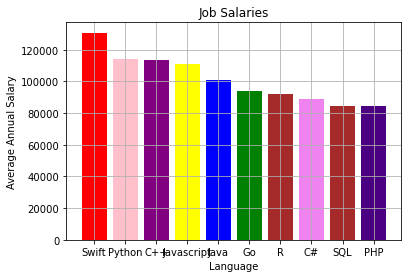

In [89]:
color=['red','pink','purple','yellow', 'blue', 'green', 'brown', 'violet', 'brown', 'indigo']
plt.bar(df['Language'], df['Average Annual Salary'], color=color)
plt.title('Job Salaries')
plt.xlabel('Language')
plt.ylabel('Average Annual Salary')
plt.grid(True)
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
